In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
print('Train Data Shape :',train.shape)
print('Test Data Shape :',test.shape)
print('----------------------------------------------------------------------')
print('Train Data columns :',train.columns)
print('Test Data columns :',test.columns)
print('----------------------------------------------------------------------')
print('Train Data Null Values :',train.isnull().sum())
print('Test Data Null Values :',train.isnull().sum())
print('----------------------------------------------------------------------')

Train Data Shape : (2834, 6)
Test Data Shape : (7, 4)
----------------------------------------------------------------------
Train Data columns : Index(['id', 'url_legal', 'license', 'excerpt', 'target', 'standard_error'], dtype='object')
Test Data columns : Index(['id', 'url_legal', 'license', 'excerpt'], dtype='object')
----------------------------------------------------------------------
Train Data Null Values : id                   0
url_legal         2004
license           2004
excerpt              0
target               0
standard_error       0
dtype: int64
Test Data Null Values : id                   0
url_legal         2004
license           2004
excerpt              0
target               0
standard_error       0
dtype: int64
----------------------------------------------------------------------


**We have 6 columns in our train data and 4 in test data.Following are columns in Train data :**


1.Id is a unique identifier. <br>
2.url_legal is url for data but we can see we have lot of null values so we will not be using in our data.<br>
3.license is liscence so we will not be using that too.<br>
4.Excerpt is our text and we will be using it for prediction.<br>
5.target is our target variable which states ease or read for a text.<br>
6.standard_error is error which giving target to texts.<br>

**Now Lets look at the Distribution of the target variable**  

(array([ 55., 120., 280., 402., 490., 563., 458., 312., 123.,  31.]),
 array([-3.67626777, -3.13750201, -2.59873625, -2.05997049, -1.52120473,
        -0.98243897, -0.44367321,  0.09509255,  0.63385831,  1.17262407,
         1.71138983]),
 <BarContainer object of 10 artists>)

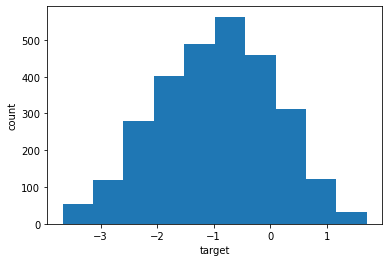

In [4]:
import matplotlib.pyplot as plt
plt.xlabel('target')
plt.ylabel('count')
plt.hist(train['target'])

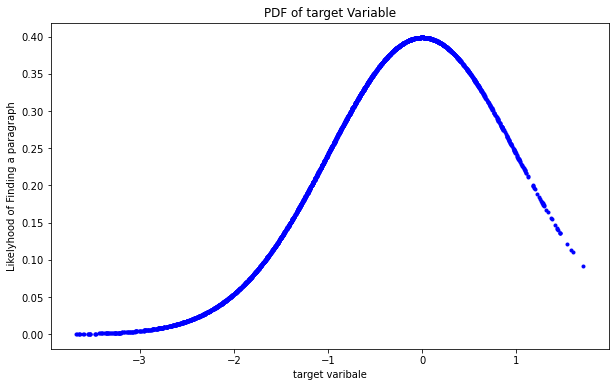

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(train['target'], stats.norm.pdf(train['target']), 'b.', label="True PDF")
ax.set_xlabel('target varibale')
ax.set_ylabel('Likelyhood of Finding a paragraph')
ax.set_title('PDF of target Variable')
plt.show()

As we know in Descending Order pf target values we have more and more complex document to read. we can observe here that we have kind of like Gaussian Distribution which is left-skewed.i.e we have lot of easy to read documents and few complex documents. The probability of Getting a easier to read document is more than that of getting a complex to read document.

**Number of words in a Document**

Max length of a document 205
Min length of a document 135
25th Percentile value 159.0
75 percentile value 188.0


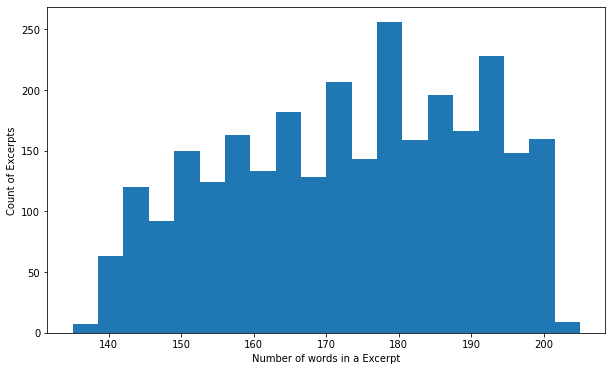

In [6]:
print('Max length of a document',max([len(i.split()) for i in train['excerpt']]))
print('Min length of a document',min([len(i.split()) for i in train['excerpt']]))
print('25th Percentile value',np.percentile([len(i.split()) for i in train['excerpt']],25))
print('75 percentile value',np.percentile([len(i.split()) for i in train['excerpt']],75))
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist([len(i.split()) for i in train['excerpt']],bins=20)
ax.set_xlabel('Number of words in a Excerpt')
ax.set_ylabel('Count of Excerpts')

plt.show()

Generally we can see that Documents are in  the range 135-205 and 25th to 75th percentile values are in 159-188

**Relation Between Commonly occuring words and complex words**

In [7]:
freq=pd.read_csv('unigram_freq.csv')  #Imprting english word Frequency DataFrame taken from : https://www.kaggle.com/rtatman/english-word-frequency
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
train['excerpt'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop)) #Removing the stop words

0       when young people returned ballroom, presented...
1       all dinner time, mrs. fayre somewhat silent, e...
2       as roger predicted, snow departed quickly came...
3       and outside palace great garden walled round, ...
4       once upon time three bears lived together hous...
                              ...                        
2829    when think dinosaurs lived, picture? do see ho...
2830    so solid? solids usually hard molecules packed...
2831    the second state matter discuss liquid. solids...
2832    solids shapes actually touch. they three dimen...
2833    animals made many cells. they eat things diges...
Name: excerpt, Length: 2834, dtype: object

In [8]:
from tqdm import tqdm
X_VocabfreqCountTrain=[]
Vocab_dict=dict(zip(freq.word, freq['count']))
vocabs=freq['word'].values        

for j in tqdm(train['excerpt']):
    x=[Vocab_dict[word] for word in j.split() if word in Vocab_dict]
    x=np.mean(np.log(x))
    X_VocabfreqCountTrain.append(x)
    
print('Spearman Correlation Between Frequency of words and in a paragraph and it ease of reading \n',pd.DataFrame([X_VocabfreqCountTrain,train['target']]).T.corr(method='spearman'))

100%|████████████████████████████████████████████████████████████████████████████| 2834/2834 [00:00<00:00, 6298.72it/s]


Spearman Correlation Between Frequency of words and in a paragraph and it ease of reading 
           0         1
0  1.000000  0.149884
1  0.149884  1.000000


As we can see even though we are taking mean of the frequency of words and ofcourse then taking log we are able to see a good amount of spearman correlation between two varibles so, **we can create the lof of mean of frequencey of words in a paragraph or its variation as a feature.**

**Relation Between Target variable and Standard Error**

Pearson Correlation between Standar Error and target variable : 
 
                   target  standard_error
target          1.000000       -0.085981
standard_error -0.085981        1.000000


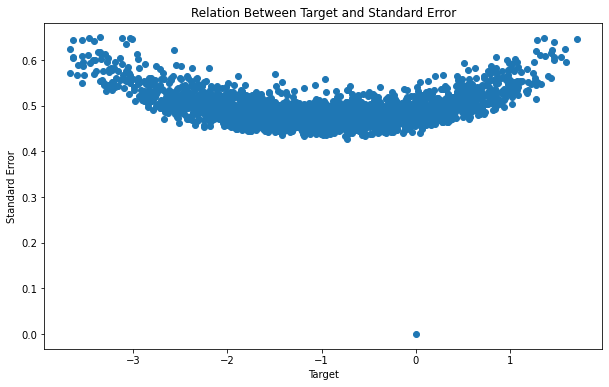

In [9]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 6))
print('Pearson Correlation between Standar Error and target variable : \n \n',train.corr())
ax.scatter(x=train['target'],y=train['standard_error'])
ax.set_xlabel("Target")
ax.set_ylabel("Standard Error")
ax.set_title('Relation Between Target and Standard Error')
plt.show()

As we can see here not much correlation between the target and the standard Error.You can see the pearson correlation is -0.0859 which is very close to zero.Also it cannot be used as feature cause it is not available with the test set.

One Outlier is there, where you can see in Standard Error is Zero.That is the case where that specific text is seen by all the teachers who were responsible for the scoring so as it was seen by all teachers Standard Error here is ***Zero***.

This is about the EDA Part of the compition as the data is very small both the fetaures as well as data points.<br><br>
***Following observations are made :***   <br>
1.No Outliers can be seen in target variable. <br>
2.As we are Only considering text in Feature Engineering, no outliers or null values can be seen in independent varibale(Feature). <br>
3.Target Variable Denotes level of ease of reading a document, Lower the Number Complex the document to read and higher the number easier it is to read. <br>
4.We have to exract features from the given document to understand the charactersistics of document that makes it hard or easy to read. Ex: We have already seen the correlation between the target variable and log of mean of frequency (from Google Web Trillion Word Corpus) of each word in a document and target varible is around 0.149. That means that can be a feature in our Model. Such a way we have to extract more features from text to be able to predict the ease of read target. <br>
5.Not Much Data Pre-processing to be done here as data is in text format and text is clean.Just Stopwords removal to be done here.


In [10]:
freq=pd.read_csv('unigram_freq.csv')  #Imprting english word Frequency DataFrame taken from : https://www.kaggle.com/rtatman/english-word-frequency
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
train['excerpt'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop)) #Removing the stop words

from tqdm import tqdm
X_VocabfreqCountTrain=[]
Vocab_dict=dict(zip(freq.word, freq['count']))
vocabs=freq['word'].values        

for j in tqdm(train['excerpt']):
    x=[Vocab_dict[word] for word in j.split() if word in Vocab_dict]
    x=np.mean(np.log(x))
    X_VocabfreqCountTrain.append(x)
    
print('Spearman Correlation Between Frequency of words and in a paragraph and it ease of reading \n',pd.DataFrame([X_VocabfreqCountTrain,train['target']]).T.corr(method='spearman'))

100%|████████████████████████████████████████████████████████████████████████████| 2834/2834 [00:00<00:00, 5063.90it/s]


Spearman Correlation Between Frequency of words and in a paragraph and it ease of reading 
           0         1
0  1.000000  0.149884
1  0.149884  1.000000


**Following are the 6 Word Clouds by binning the target labels into bins of 1.0 and plotting their word clouds.**

For target less than : -3.0 and greater than  -4.0



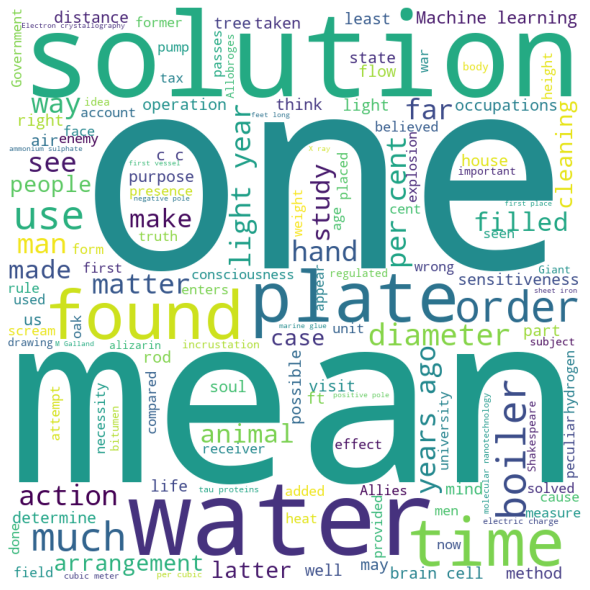

For target less than : -2.0 and greater than  -3.0



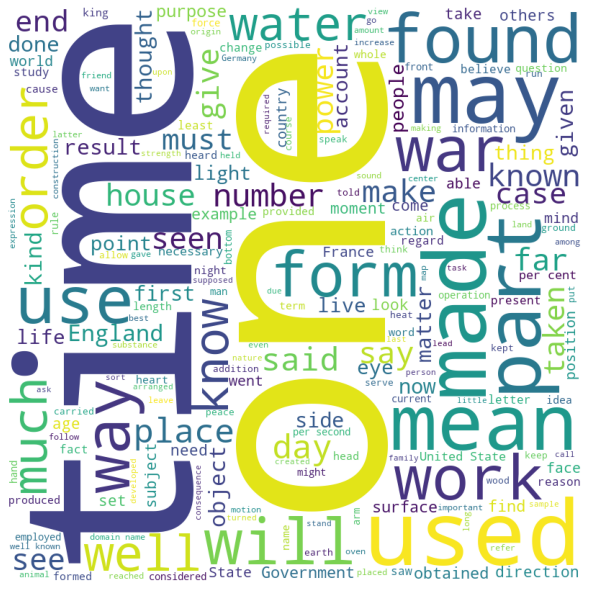

For target less than : -1.0 and greater than  -2.0



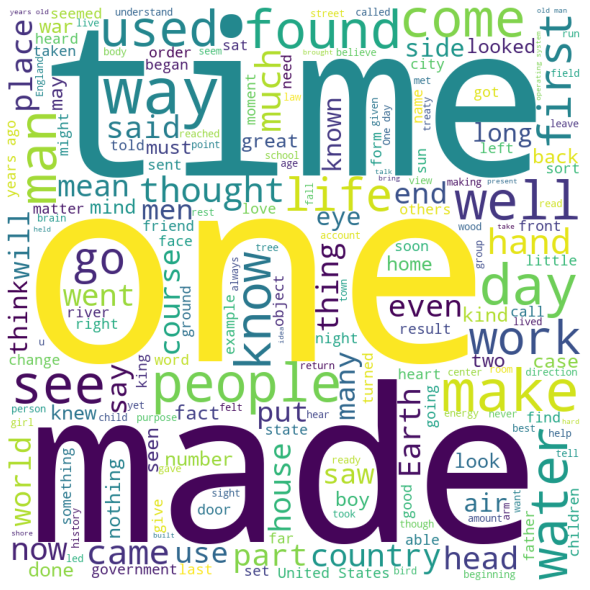

For target less than : 0 and greater than  -1



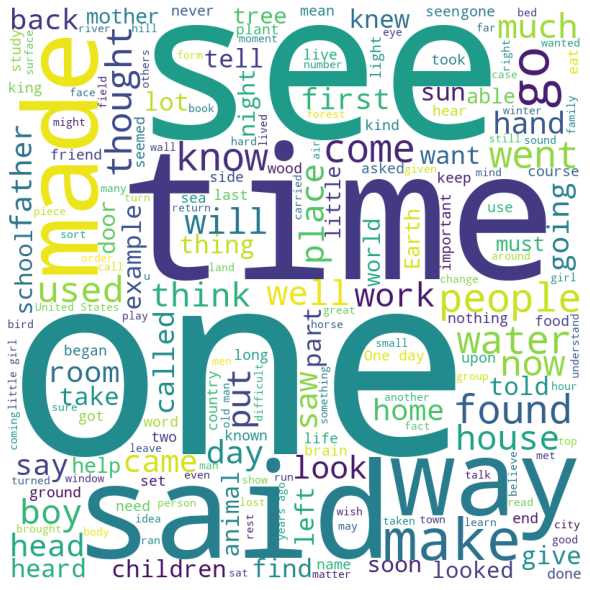

For target less than : 1.0 and greater than  0.0



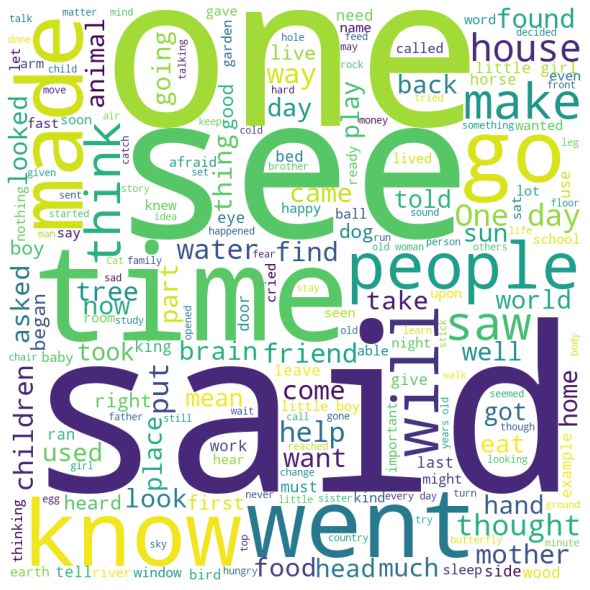

For target less than : 2.0 and greater than  1.0



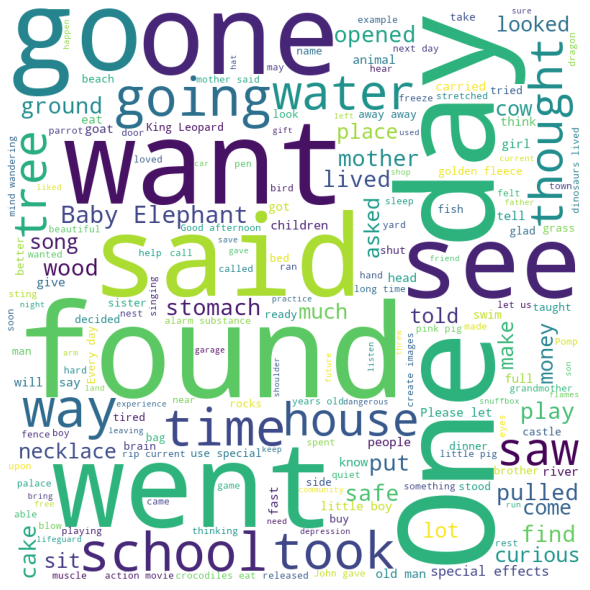

In [11]:
from wordcloud import WordCloud, STOPWORDS
for k in [-3.0,-2.0,-1.0,0,1.0,2.0]:
    print('For target less than :',k,'and greater than ',k-1)
    str1=''
    print()
    str1=str1.join([i for i in train[(train['target']<=k) & (train['target']>=k-1)]['excerpt']])
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    collocation_threshold=3,
                    min_font_size = 10).generate(str1)

    # plot the WordCloud image                       
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()
    

**<h1>FeatureEngineering</h1>**

Following are some features that I created:<br>
1.As we saw above in notebook , log of average of Frequency of words in a sentence (Frequency taken from Google Web Trillion Word Corpus). <br>
2.Word Vectors From Spacy embeddings. <br>
3.Word Vectors from Word2Vec embeddings. <br>
4.Word Vectors from glove embeddings. <br>
5.Features from Readability Package. <br>
6.TF-IDF Features. <br>
7.Finally Take SVD (100 components) on concatenation of all above data. <br>
8.Concat all the features from 1 to 6 and again concat it with feature 7 . <br>

In [12]:
import readability as r
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
from gensim.models import KeyedVectors
Vocab=pd.read_csv('./unigram_freq.csv')
import spacy
from nltk import word_tokenize
from nltk.tokenize import word_tokenize 
import en_core_web_lg
from scipy import sparse
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train,train['target'])

In [15]:
def Readabiity_features(document): #Readability Features 
    Feature_list=[]
    Readability_doc=r.getmeasures(document,lang='en')
    l=[Readability_doc['sentence info'][i] for i in Readability_doc['sentence info'].keys()]+[Readability_doc['readability grades'][i] for i in Readability_doc['readability grades'].keys()]+[Readability_doc['word usage'][i] for i in Readability_doc['word usage'].keys()]+[Readability_doc['sentence beginnings'][i] for i in Readability_doc['sentence beginnings'].keys()]
    return l

def TFIDF_Features(data,tfidf,train=1):  #TFIDF Features
    if train==1:
        TFIDF_Data=tfidf.fit_transform(data['excerpt'])
        vocab_len=len(tfidf.vocabulary_)
    else:
        TFIDF_Data=tfidf.transform(data['excerpt'])
        vocab_len=len(tfidf.vocabulary_)
    return TFIDF_Data,vocab_len,tfidf

def W2v_Features(data,model):      #Word2Vec Features 300d
    embedding_matrix = np.zeros((len(data), 300))

    for i,words in tqdm(enumerate(data['excerpt'])):
        vector=[]
        for w in words:
            try:
                vector.append(model[w])
            except :
                pass
        embedding_matrix[i]=np.mean(vector , axis=0)
    return embedding_matrix

def Frequency_Feature(data): #word Frequency feature
    X_VocabfreqCount=[]
    for j in tqdm(data['excerpt']):
        x=[Vocab_dict[word] for word in j.split() if word in Vocab_dict]
        x=np.mean(np.log(x))
        X_VocabfreqCount.append(x)
    return X_VocabfreqCount


def sentenceToVecFeature(sentence,embeddings_index): #Glove Vector 300d 
    words = str(sentence).lower()
    words = word_tokenize(words)
    words = [w for w in words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

def SpacyWordVectorEmbedding(data,nlp): #Spacy Vector 300d Citation : https://spacy.io/models
    SpacyVector=[]
    for j,i in tqdm(enumerate(data['excerpt'])):
        SpacyVector.append(nlp(i).vector)
    return SpacyVector

In [16]:
readability=pd.DataFrame(*zip([X_train["excerpt"].apply(lambda x : Readabiity_features(x))])).T
readability_train = readability.excerpt.apply(pd.Series)
readability=pd.DataFrame(*zip([X_test["excerpt"].apply(lambda x : Readabiity_features(x))])).T
readability_test = readability.excerpt.apply(pd.Series)


tfidf=TfidfVectorizer()
TfIdf_train,Vocab_len,tfidf=TFIDF_Features(X_train,tfidf,train=1)
TfIdf_test,_,_=TFIDF_Features(X_test,tfidf,train=0)


model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True)
W2v_Train=W2v_Features(X_train,model)
W2v_test=W2v_Features(X_test,model)


Vocab_dict=dict(zip(Vocab.word, Vocab['count']))
FrequencyOfWordsFeature_train=Frequency_Feature(X_train)
FrequencyOfWordsFeature_test=Frequency_Feature(X_test)


embeddings_index = {}
f = open('./glove.6B.300d.txt', encoding="utf8")
for line in tqdm(f):
    values = line.split()
    word = values[0]
    try:
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    except ValueError:
        pass
f.close()


GloveVectorsTrain = [sentenceToVecFeature(x,embeddings_index) for x in tqdm(X_train['excerpt'])]
GloveVectorsTest = [sentenceToVecFeature(x,embeddings_index) for x in tqdm(X_test['excerpt'])]


nlp = en_core_web_lg.load()
SpacyTrainEmbedding=SpacyWordVectorEmbedding(X_train,nlp)
SpacyTestEmbedding=SpacyWordVectorEmbedding(X_test,nlp)

2125it [00:06, 350.10it/s]
709it [00:01, 386.15it/s]
100%|██████████████████████████████████████████████████████████████████████████████| 709/709 [00:00<00:00, 7052.98it/s]
400000it [01:03, 6311.15it/s]
100%|███████████████████████████████████████████████████████████████████████████████| 709/709 [00:02<00:00, 268.84it/s]
2125it [01:57, 18.03it/s]
709it [00:35, 19.74it/s]


In [17]:
X_trainFinal=sparse.hstack([sparse.csr_matrix(readability_train.values),W2v_Train,np.array(SpacyTrainEmbedding),GloveVectorsTrain,sparse.csr_matrix(TfIdf_train),np.array(FrequencyOfWordsFeature_train)[:,None]])
X_testFinal=sparse.hstack([sparse.csr_matrix(readability_test.values),W2v_test,np.array(SpacyTestEmbedding),GloveVectorsTest,sparse.csr_matrix(TfIdf_test),np.array(FrequencyOfWordsFeature_test)[:,None]])

In [18]:
from sklearn.decomposition import TruncatedSVD
SVD=TruncatedSVD(n_components=100)
svd_train=SVD.fit_transform(X_trainFinal) #Dimentionalirty Reduction to 100 Dimentions
svd_test=SVD.transform(X_testFinal)

del SVD

X_trainFinalSVD=sparse.hstack([X_trainFinal,svd_train]) #Adding to Previous Dimentions (seems to improve result when use both orignal data and SVD of Data.)
X_testFinalSVD=sparse.hstack([X_testFinal,svd_test])

In [47]:
bins = np.linspace(X_train['target'].min(),X_train['target'].max(),10)
labels=[i for i in range(1,len(bins))]
X_train['target_binned'] = pd.cut(X_train['target'], bins=bins,labels=labels, include_lowest=True)

C:\Users\S\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X_trainFinalSVD)

In [49]:
df_subset=pd.DataFrame()

C:\Users\S\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\S\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

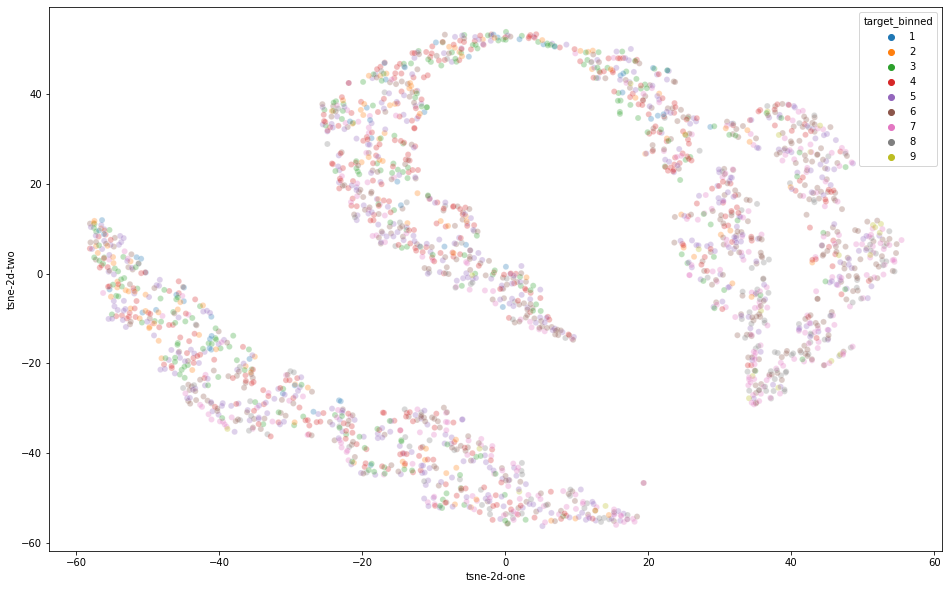

In [50]:
X_train['tsne-2d-one'] = X_embedded[:,0]
X_train['tsne-2d-two'] = X_embedded[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target_binned",
    data=X_train,
    legend="full",
    alpha=0.3
)

It can be clearly oberserved that TSNE is not able to seperate the classes well.We still cannot seperate any of the class by looking at the TSNE plot and all the classes seem to be randomly spread.That concludes not much insight can be observed by converting the regression problem to the classification problem and the classes are not easy seperable.So we won't be converting the regression problem into classification problem.